# Exam : part 2
You should do the following:
* Load the nifti file in the data directory
* Display the images $ 128 \times 128 \times 8 $ (where 8 is the number of RF channels)
* Combine data acquired from different RF channels
* Display the combined image

### Loading Nifti File

In [1]:
push!(LOAD_PATH,"library");
using Read_NIfTI1_real
using PyPlot
using NK_tools

In [2]:
filename = "data/data_8channel.nii.gz";
headerinfo = load_niigz_header(filename); 
data = load_niigz_data(filename, headerinfo); # see the source code in library/Read_NIfTI1_real.jl
println("data size : ", size(data))
print("type of data: ", typeof(data))

data size : (128, 128, 8)
type of data: Array{Int16,3}

### Displaying Images

In [3]:
imgdata = copy(data);

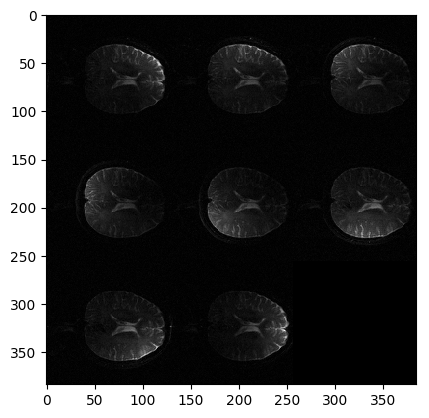

294912

In [4]:
imal(abs.(imgdata[:,:,:]),3,3);

### Combining Data from all 8 RF Channels

In [5]:
# The data is in integers so manipulate them further we should first convert
# the data to Floats
dataDouble = convert(Array{Float64},imgdata);
println("type of data: ", typeof(dataDouble))

type of data: Array{Float64,3}


In [6]:
# Can be done by doing the "root-mean-square" of the images
combinedImgData = sqrt.(mean(abs.(dataDouble.^2),3));

### Combined Image Displayed

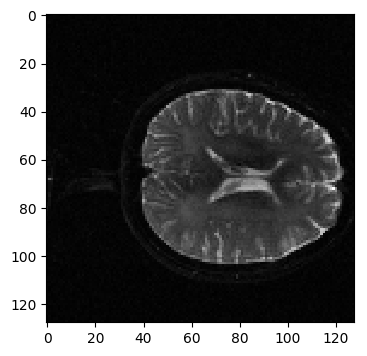

PyObject <matplotlib.image.AxesImage object at 0x000000003301C2B0>

In [7]:
figure(1,figsize = (4,4));imshow(combinedImgData[:,:,1], cmap = "gray")